17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded 2000 IMDb reviews.
Topic 1: unk br lemmon oscar felix comic lucas satan matthau ted
Topic 2: movie unk just like don really good start movies think
Topic 3: br unk film start doctor movie brooklyn like monster good
Topic 4: killer slasher movie flick scream just unk scene bad ending
Topic 5: funny unk hilarious eddie really movie comedies seen start jokes
Topic 6: roles cher love cage late steve guy movie start mean
Topic 7: unk br film movie start story girl characters know time
Topic 8: unk movie ape apes really start burton just rate time
Topic 9: comments stone wondering negative reviewers basic instinct liked deep left
Topic 10: unk br film start man time great love performance life


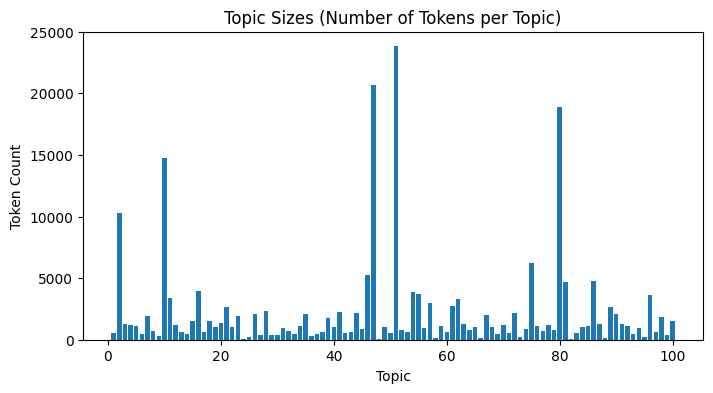

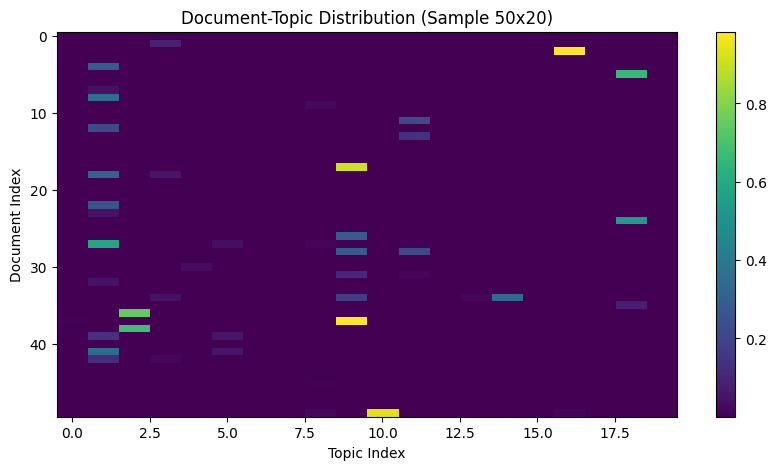

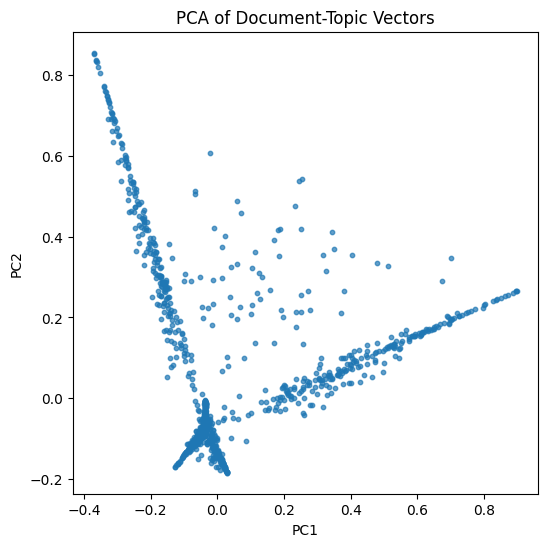

In [1]:

# ============================================
# LDA Topic Modeling on IMDb Dataset (100 topics)
# ============================================

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from tensorflow.keras.datasets import imdb

# -------------------------------
# 1. Load IMDb dataset
# -------------------------------
def load_imdb_reviews(num_words=10000, max_docs=2000):
    (X_train, _), (X_test, _) = imdb.load_data(num_words=num_words)
    word_index = imdb.get_word_index()
    index_word = {v + 3: k for k, v in word_index.items()}
    for i, w in enumerate(["<PAD>", "<START>", "<UNK>", "<UNUSED>"]):
        index_word[i] = w

    all_data = np.concatenate([X_train, X_test])
    docs = [" ".join([index_word.get(w, "?") for w in x]) for x in all_data[:max_docs]]
    print(f"Loaded {len(docs)} IMDb reviews.")
    return docs

docs = load_imdb_reviews()

# -------------------------------
# 2. Preprocess and Vectorize
# -------------------------------
def clean_text(text):
    text = re.sub(r"[^a-z\s]", " ", text.lower())
    return re.sub(r"\s+", " ", text).strip()

cleaned_docs = [clean_text(d) for d in docs]
vectorizer = CountVectorizer(max_features=5000, stop_words="english", min_df=3)
X = vectorizer.fit_transform(cleaned_docs)
vocab = vectorizer.get_feature_names_out()

# -------------------------------
# 3. Train LDA model (100 topics)
# -------------------------------
lda = LatentDirichletAllocation(
    n_components=100,
    max_iter=20,
    learning_method="batch",
    random_state=42,
    n_jobs=-1
)
lda.fit(X)

# -------------------------------
# 4. Display top words per topic
# -------------------------------
def display_topics(model, feature_names, top_words=10):
    for topic_idx, topic in enumerate(model.components_[:10]):
        top_features = [feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]
        print(f"Topic {topic_idx+1}: {' '.join(top_features)}")

display_topics(lda, vocab)

# -------------------------------
# 5. Visualizations
# -------------------------------
doc_topic = lda.transform(X)

# Topic size plot
topic_sizes = lda.components_.sum(axis=1)
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 101), topic_sizes)
plt.title("Topic Sizes (Number of Tokens per Topic)")
plt.xlabel("Topic")
plt.ylabel("Token Count")
plt.show()

# 2D PCA visualization
pca = PCA(n_components=2)
doc_2d = pca.fit_transform(doc_topic)
plt.figure(figsize=(6, 6))
plt.scatter(doc_2d[:, 0], doc_2d[:, 1], s=10, alpha=0.7)
plt.title("PCA of Document-Topic Vectors")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()